In [71]:
# Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [72]:
# Read in the data and make it into a data frame
file = ('crypto_data.csv')
df = pd.read_csv(file)

# Look at the data
df.head()

# Look at a summary
# df.info()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [73]:
# Drop all the cryptocurrencies that are not being traded. 
# AKA filter for currencies that are currently being traded
# Then drop the "IsTrading" column

df2 = df.drop(df.index[df['IsTrading'] == False]).dropna()
df2 = df.drop(columns=['IsTrading'])

# Look at the new data frame
df2.head()

# Look at the summary
# df2.info()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [74]:
# Get rid of all of the rows that have any null values
# First check for nulls
for column in df2.columns:
    print(f"{column}: {df2[column].isnull().sum()} nulls")

Unnamed: 0: 0 nulls
CoinName: 0 nulls
Algorithm: 0 nulls
ProofType: 0 nulls
TotalCoinsMined: 508 nulls
TotalCoinSupply: 0 nulls


In [75]:
# Filter for cryptos that have been mined
# AKA total coins minds should be greater than zero

df3 = df2.loc[df2["TotalCoinsMined"] >= 0]

# Look at the data frame
df3.head()

# Look at the summary
# df3.info()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [76]:
# For the dataset to be comprehensible to a machine learning algorithms, the data needs to be numeric
# We do not need the name of the coins, so drop that column
df3.drop(columns = ['CoinName'], inplace=True)

# Look at the data frame
df3.head()

C:\Users\fligh\AppData\Local\Temp\ipykernel_7164\2324322641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns = ['CoinName'], inplace=True)


,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000


In [77]:
# Convert remaining features with text values, ie Algorith and ProofType.
# To do so, use Pandas to create dummy variables
df3["TotalCoinSupply"] = df3["TotalCoinSupply"].astype(float)
df4 = df3.drop(columns=['Unnamed: 0'])
df4 =pd.get_dummies(df4, columns=["Algorithm", "ProofType"])
df4.head()


C:\Users\fligh\AppData\Local\Temp\ipykernel_7164\1221533840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["TotalCoinSupply"] = df3["TotalCoinSupply"].astype(float)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Standardize the dataset so that columns that contain larger values do not unduly influence the outcome.

df_scaled = StandardScaler().fit_transform(df4)
df_scaled

array([[-0.10075505, -0.03671357, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.07346881, -0.03671341, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.10075505, -0.03671357, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115],
       ...,
       [-0.10056637, -0.03671357, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.10075173, -0.03671357, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115],
       [-0.1001993 , -0.03671354, -0.03671115, ..., -0.03671115,
        -0.03671115, -0.03671115]])

In [79]:
# Preserve 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(df_scaled)

In [80]:
df_crypto = pd.DataFrame(data = crypto_pca)
df_crypto.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,-0.221420,-1.309291,-0.410486,-5.628369e-08,-1.905353e-11,-2.642566e-10,-3.366197e-10,-0.002581,-1.056657,-0.320977,...,-3.422174e-13,-1.028930e-13,8.045883e-13,1.497771e-14,-1.333163e-12,-3.127099e-13,6.814615e-13,-1.912377e-12,2.770541e-13,9.247329e-14
1,-0.206366,-1.308072,-0.411105,-5.628370e-08,-1.905355e-11,-2.642565e-10,-3.366196e-10,-0.004043,-1.060002,-0.321756,...,-3.423980e-13,-1.030766e-13,8.042781e-13,1.517960e-14,-1.333116e-12,-3.133182e-13,6.817395e-13,-1.912532e-12,2.769318e-13,9.232952e-14
2,-0.155665,-0.834893,-0.252079,-4.039711e-08,-1.367978e-11,-1.896704e-10,-2.416107e-10,-0.011544,-0.663789,-0.117342,...,-1.094872e-14,5.000168e-15,5.417300e-15,2.000161e-15,-1.028866e-14,4.159567e-15,5.735403e-15,-4.044682e-15,-8.010260e-15,-1.008433e-14
3,0.297021,-1.999834,-0.436183,-8.087862e-08,-2.738191e-11,-3.797390e-10,-4.837319e-10,-0.049918,-0.807389,-0.254223,...,-8.703067e-15,4.880559e-14,1.524438e-14,5.785790e-14,-3.852312e-15,3.575792e-14,-2.865878e-15,-2.193291e-14,-1.395061e-14,-1.014242e-13
4,-0.192807,1.486221,0.094671,3.325844e-08,1.126874e-11,1.561590e-10,1.989280e-10,0.000817,-0.033015,0.067518,...,-1.045860e-14,7.054602e-15,5.488658e-15,4.663453e-15,-9.342712e-15,4.880669e-15,3.207519e-15,-2.981499e-15,-7.707939e-15,-1.298175e-14


In [81]:
pca.explained_variance_ratio_

array([0.02007376, 0.01890392, 0.01809161, 0.0180423 , 0.0180423 ,
       0.0180423 , 0.0180423 , 0.01800795, 0.01583274, 0.01540481,
       0.01441647, 0.01423596, 0.01303903, 0.01296193, 0.01262862,
       0.01191324, 0.0111053 , 0.01078529, 0.01034142, 0.00974588,
       0.0092703 , 0.00923764, 0.00920438, 0.00915991, 0.00914074,
       0.00912636, 0.00910096, 0.00908261, 0.00908178, 0.00907739,
       0.00907565, 0.00906949, 0.00906476, 0.00906041, 0.00905777,
       0.00905728, 0.00905295, 0.00904732, 0.00904553, 0.00904553,
       0.00904298, 0.00903932, 0.009038  , 0.00903696, 0.009036  ,
       0.00903375, 0.00903332, 0.00903332, 0.00903332, 0.00903257,
       0.00903005, 0.00902698, 0.00902115, 0.00902115, 0.00902115,
       0.00902115, 0.00902115, 0.00902115, 0.00902115, 0.00902115,
       0.00902115, 0.00902115, 0.00902115, 0.00902115, 0.00902115,
       0.00902115, 0.00902115, 0.00902115, 0.00902115, 0.00902115,
       0.00902115, 0.00902115, 0.00902115, 0.00902115, 0.00902

The number of featured reduced to 87 from 111 after presering 90% of the explained variance.

In [82]:
# Reduce the dimensions with t-SNE and inspect the results. \
# To do so, run t-SNE on the principal components: the output of the PCA transformation. 
# Then create a scatter plot of the t-SNE output. 
# Observe whether there are distinct clusters or not.

# Run t-SNE
tsne = TSNE(learning_rate = 250)
tsne_features = tsne.fit_transform(crypto_pca)
print(tsne_features.shape)
tsne_features

c:\Users\fligh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(743, 2)


array([[  0.20913379,  20.575705  ],
       [  8.331942  ,  18.06594   ],
       [ -7.079043  , -36.306667  ],
       ...,
       [-27.951962  ,  10.161473  ],
       [  7.9413505 , -14.829018  ],
       [  4.0514164 ,  13.203509  ]], dtype=float32)

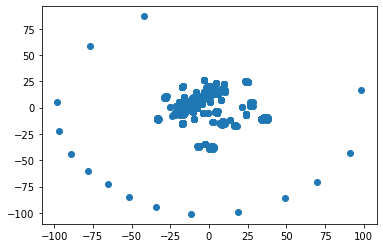

In [83]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

c:\Users\fligh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


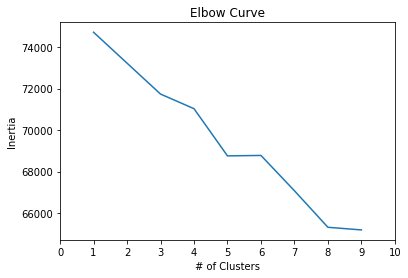

In [84]:
# Make an elbow plot to identify the best number of clusters
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)
df_elbow.head()

# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('# of Clusters')
plt.ylabel('Inertia')
plt.show()

I believe that this chart shows that 5 or 6 clusters is best. 